## Goal of this analysis: explore Capital Bikeshare dataset
- This notebook explores the dataset provided by Capital Bikeshare and downloaded from the Kaggle website
- The goal of the exploration is to get insights into relationships between bike demand and potential predictors
- In ols_linear_regression.ipynb, I use these insights to build a simple model based on ordinary least squares linear regression  

## Import external libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Read training data from CSV file

In [2]:
data = pd.read_csv("Data/train.csv", parse_dates=True, index_col = 0)

## 1. Check columns, column types, index and raw data

### Target variables
- The "count" column is the bike rental count, which is the target variable
- The "count" column is the sum of both "casual" and "registered" columns. Both of these columns could therefore also represent target columns in separate models
- The maximum bicycle count at any single hour is 977 bikes. The median and 75% quantiles are 145 and 284 respectively, indicating a heavy right tail
- The minimum bicycle count is 1. In particular, bike count can not be negative

### Possible predictor variables
- Boolean variables: holiday, workingday
- Categorical variables: season and weather (possibly ordinal)
- Numerical variables: temp, atemp, humidity, windspeed
- The index is a timestamp
- The dataset has 10886 records

### Further observations
- "atemp" column is the apparent temperature (temperature equivalent perceived by humans caused by the combined effect of air temperature, humidity and wind speed)
- "atemp" is likely to be highly correlated with the "temp" column


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### No missing values in dataset

In [7]:
data.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 2. Plot bike rental count on various timescales

### Plot bike rental count vs. time using a 30-day rolling average
- Bike rental demand has a seasonal cycle, peaking in the Summer months and with a trough in the Winter months
- Bike rental demand has a strong positive annual trend

Text(0, 0.5, 'bike count')

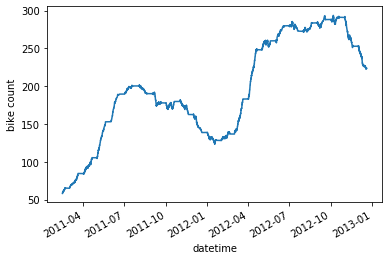

In [8]:
data.rolling(window = 24 * 30).mean()['count'].plot()
plt.ylabel("bike count")

### Extract time features from index
- Extracting time features makes it easier to group data, and find relationships and new features

In [9]:
data['yr'] = data.index.year
data['mon'] = data.index.month
data['day'] = data.index.day
data['dayOfWeek'] = data.index.dayofweek
data['qtr'] = data.index.quarter
data['day_name'] = data.index.day_name()
data['hr'] = data.index.hour

In [10]:
data.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yr,mon,day,dayOfWeek,qtr,day_name,hr
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,Saturday,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,Saturday,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,Saturday,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,Saturday,4


### Plot bike count vs. hour of day for first day of dataset
- Bike rental demand has a daily cycle (night time vs. day time)

Text(0.5, 1.0, 'daily cycle')

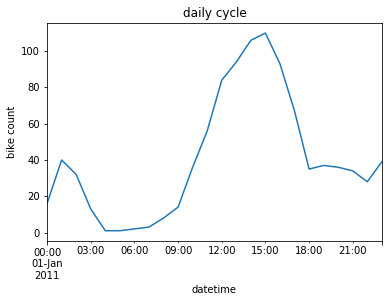

In [11]:
data['count'].iloc[:24].plot()
plt.ylabel("bike count")
plt.title("daily cycle")

### Plot average bike count vs. hour of day 
- On average, bike rental demand has two large peaks in the morning at about 8am and in the evening at about 6pm
- Only few bikes are used in the early morning hours
- In the evening, bike counts decline sharply after 8 pm

Text(0.5, 1.0, 'Average bike count vs. hour of day')

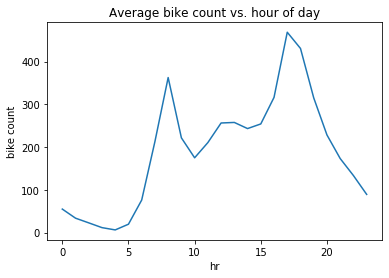

In [12]:
data.groupby('hr')['count'].mean().plot()
plt.ylabel("bike count")
plt.title("Average bike count vs. hour of day")

### Plot count vs. time for first week of dataset
- Bike demand follows a weekly cycle as well
- Week days have two sharp rush hour peaks
- Saturdays and Sundays have a single broad peak, much lower than the rush hour peaks on week days

Text(0.5, 1.0, 'weekly cycle')

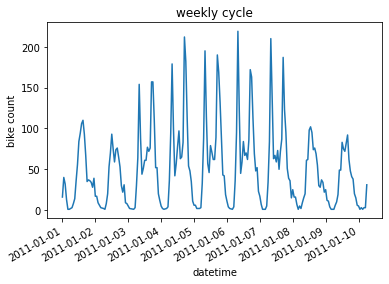

In [13]:
data['count'].iloc[:24*9].plot()
plt.ylabel("bike count")
plt.title("weekly cycle")

### Plot count statistics vs. day of week
- Although the days have very different hourly cycles, the mean bicycle count is stable across all days
- 25%, 50%, 75% Quantiles are comparable across all days of the week
- The maximum count is lower on weekend days (5 and 6 for Saturday and Sunday) than on week days
- There are a large number of outliers for all days of the week, as defined by Q3 + 1.5* IQR
- A logarithmic transformation of the target count variable takes care of the heavy tail

Text(0.5, 1.0, 'Average count per week day')

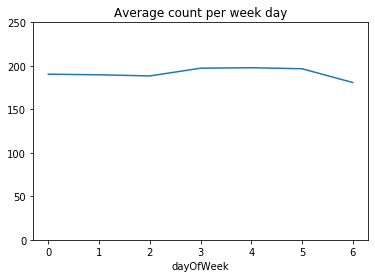

In [14]:
data.groupby('dayOfWeek')['count'].mean().plot()
plt.axis(ymin=0, ymax = 250)
plt.title("Average count per week day")

Text(0.5, 0, 'dayOfWeek')

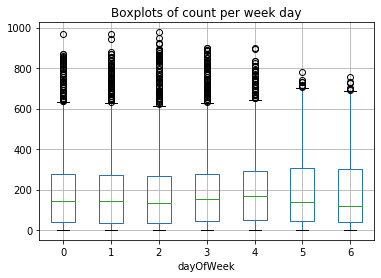

In [15]:
day0 = pd.DataFrame(data.groupby('dayOfWeek')['count']).iloc[0][1]
day1 = pd.DataFrame(data.groupby('dayOfWeek')['count']).iloc[1][1]
day2 = pd.DataFrame(data.groupby('dayOfWeek')['count']).iloc[2][1]
day3 = pd.DataFrame(data.groupby('dayOfWeek')['count']).iloc[3][1]
day4 = pd.DataFrame(data.groupby('dayOfWeek')['count']).iloc[4][1]
day5 = pd.DataFrame(data.groupby('dayOfWeek')['count']).iloc[5][1]
day6 = pd.DataFrame(data.groupby('dayOfWeek')['count']).iloc[6][1]
days = pd.DataFrame(zip(day0, day1, day2, day3, day4, day5, day6))

days.boxplot()
plt.title("Boxplots of count per week day")
plt.xlabel("dayOfWeek")

Text(0.5, 0, 'dayOfWeek')

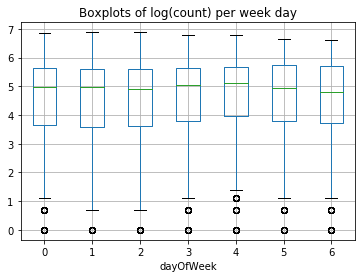

In [16]:
data['logCount'] = np.log(data['count'])
day0 = pd.DataFrame(data.groupby('dayOfWeek')['logCount']).iloc[0][1]
day1 = pd.DataFrame(data.groupby('dayOfWeek')['logCount']).iloc[1][1]
day2 = pd.DataFrame(data.groupby('dayOfWeek')['logCount']).iloc[2][1]
day3 = pd.DataFrame(data.groupby('dayOfWeek')['logCount']).iloc[3][1]
day4 = pd.DataFrame(data.groupby('dayOfWeek')['logCount']).iloc[4][1]
day5 = pd.DataFrame(data.groupby('dayOfWeek')['logCount']).iloc[5][1]
day6 = pd.DataFrame(data.groupby('dayOfWeek')['logCount']).iloc[6][1]
days = pd.DataFrame(zip(day0, day1, day2, day3, day4, day5, day6))

days.boxplot()
plt.title("Boxplots of log(count) per week day")
plt.xlabel("dayOfWeek")

In [17]:
data.groupby('dayOfWeek')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
dayOfWeek,,,,,,,,
0,1551.0,190.390716,180.943376,1.0,39.0,146.0,277.5,968.0
1,1539.0,189.723847,186.719673,1.0,36.0,146.0,274.0,970.0
2,1551.0,188.411348,190.942004,1.0,38.0,136.0,270.5,977.0
3,1553.0,197.296201,187.606619,1.0,44.0,155.0,280.0,901.0
4,1529.0,197.844343,172.518208,1.0,52.0,167.0,290.0,900.0
5,1584.0,196.665404,180.917795,1.0,45.0,141.5,309.5,783.0
6,1579.0,180.839772,167.022145,1.0,43.0,119.0,298.0,757.0


### Plot count vs. month of year
- January has the lowest average count
- June has the highest average count
- "Inverted U-shape" of demand during the year

Text(0.5, 1.0, 'Missing data')

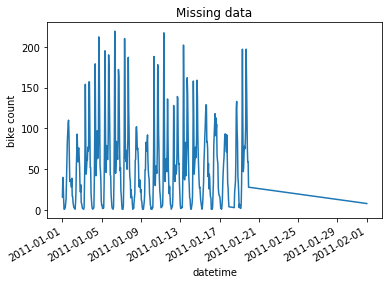

In [18]:
data['count'].iloc[:24*18].plot() 
plt.ylabel("bike count")
plt.title("Missing data")

**Data is missing e.g. between 19.01.2011 and 31.01.2011**
- Only entire days are missing. Missing days are part of the hold-out test set
- The hold-out test set contains data from the 20th day of each month until the end of the same month

In [19]:
data.iloc[24*17+20:24*19].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yr,mon,day,dayOfWeek,qtr,day_name,hr,logCount
datetime,,,,,,,,,,,,,,,,,,,
2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59,2011,1,19,2,1,Wednesday,21,4.077537
2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59,2011,1,19,2,1,Wednesday,22,4.077537
2011-01-19 23:00:00,1,0,1,1,12.30,13.635,52,31.0009,1,27,28,2011,1,19,2,1,Wednesday,23,3.332205
2011-02-01 00:00:00,1,0,1,2,6.56,9.090,64,7.0015,2,6,8,2011,2,1,1,1,Tuesday,0,2.079442
2011-02-01 01:00:00,1,0,1,2,6.56,9.090,69,7.0015,0,3,3,2011,2,1,1,1,Tuesday,1,1.098612


Text(0.5, 1.0, 'mean bike count per month')

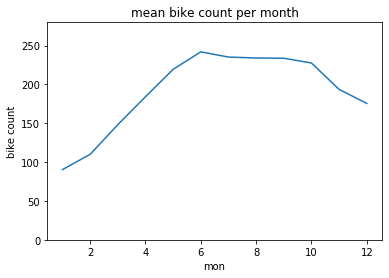

In [20]:
data.groupby('mon')['count'].mean().plot()
plt.axis(ymin=0, ymax = 280)
plt.ylabel("bike count")
plt.title("mean bike count per month")

### Plot count vs. quarter
- Quarterly mean count has similar "Inverted U-shape" as monthly mean data
- Quarterly mean count is less granular than monthly mean count

Text(0.5, 1.0, 'mean bike count per quarter')

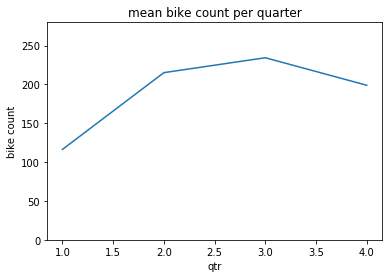

In [21]:
data.groupby('qtr')['count'].mean().plot()
plt.axis(ymin=0, ymax = 280)
plt.ylabel("bike count")
plt.title("mean bike count per quarter")

### Plot count vs. season
- Count by season is very similar to count by quarter, effectively having the same information

Text(0.5, 1.0, 'mean bike count per season')

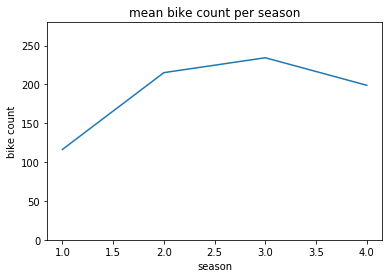

In [22]:
data.groupby('season')['count'].mean().plot()
plt.axis(ymin=0, ymax = 280)
plt.ylabel("bike count")
plt.title("mean bike count per season")

## 3. Plot bike rental count vs. weather variables

### Plot bike count vs. categorical "weather" column
- "weather" contains 4 unique categories
- weather types are fairly stable across all seasons
- The value of 4 is observed only once in the entire dataset. It should be removed from the training data
- Category 1 is by far most prevalent. Category two has less than half the records as category 1. Category 3 represents a small amount of records
- Category 1 has the largest mean bicycle count
- Category 3 has the lowest mean bicycle count
- Relative differences in mean bicycle counts among categories is fairly stable across seasons

In [23]:
data.weather.unique()

array([1, 2, 3, 4])

#### Check "weather" categories by looking at mean values of weather variables
- Categories 1, 2, and 3 differ mostly in mean humidity levels
- Category 4 has a much lower mean temperature, but comprises only a single record

In [24]:
data.groupby("weather")[['count','temp','atemp','humidity','windspeed']].mean()

,count,temp,atemp,humidity,windspeed
weather,,,,,
1,205.236791,20.557122,23.994126,56.716769,12.892542
2,178.955540,19.614608,23.072414,69.100565,12.179905
3,118.846333,19.546356,22.753091,81.341094,14.071248
4,164.000000,8.200000,11.365000,86.000000,6.003200


In [25]:
data.groupby(["season","weather"]).mon.count().unstack()

weather,1,2,3,4
season,,,,
1,1759.0,715.0,211.0,1.0
2,1801.0,708.0,224.0,NaN
3,1930.0,604.0,199.0,NaN
4,1702.0,807.0,225.0,NaN


Text(0.5, 1.0, 'Total number of records by weather type')

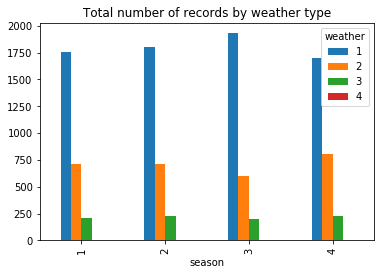

In [26]:
data.groupby(["season","weather"]).mon.count().unstack().plot.bar()
plt.title("Total number of records by weather type")

Text(0.5, 1.0, 'mean bicycle count')

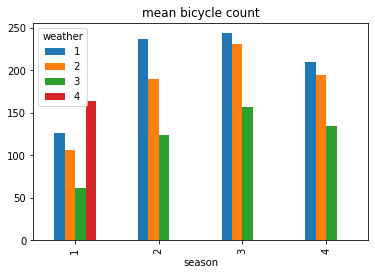

In [27]:
data.groupby(["season","weather"])['count'].mean().unstack().plot.bar()
plt.title("mean bicycle count")

### Plot bike count vs. numerical weather columns

#### Temperature
- Bike count is positively linear in both "temp" and "atemp" variables for the mid-range
- The bike count dips mid-range (29.812, 32.046) for the "atemp" variable
- The bike count hits a ceiling and declines for large temperatures for both "temp" and "atemp"
- Ideally, large temperatures should be "bucketed off" and mid-range temperatures kept numerical because of their strong linear relationship with bike count. However, linear regression cannot deal with missing values for the numerical variable. Instead, the temperature variable must be transformed either by applying
    - higher order polynomial terms
    - a simple binning of values and one-hot-encoding
    - an inverse 1/x transformation to model the ceiling
    - other non-linear transformations

In [28]:
data['binnedTemp'] = pd.cut(data['temp'], bins=20)
data['binnedATemp'] = pd.cut(data['atemp'], bins=20)
data['binnedHum'] = pd.cut(data['humidity'], bins=20)
data['binnedWind'] = pd.cut(data['windspeed'], bins=10)

In [29]:
data.groupby(['binnedTemp'])['count'].count()

binnedTemp
(0.78, 2.829]         14
(2.829, 4.838]        55
(4.838, 6.847]       313
(6.847, 8.856]       335
(8.856, 10.865]      874
(10.865, 12.874]     566
(12.874, 14.883]    1236
(14.883, 16.892]     655
(16.892, 18.901]    1090
(18.901, 20.91]      497
(20.91, 22.919]      765
(22.919, 24.928]     988
(24.928, 26.937]     856
(26.937, 28.946]    1045
(28.946, 30.955]     652
(30.955, 32.964]     542
(32.964, 34.973]     210
(34.973, 36.982]     145
(36.982, 38.991]      41
(38.991, 41.0]         7
Name: count, dtype: int64

Text(0.5, 1.0, 'mean bicycle count vs. temp')

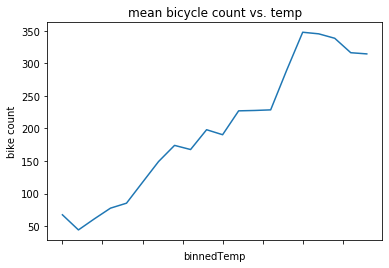

In [30]:
data.groupby(['binnedTemp'])['count'].mean().plot()
plt.ylabel("bike count")
plt.title("mean bicycle count vs. temp")

In [31]:
data.groupby(['binnedATemp'])['count'].count()

binnedATemp
(0.715, 2.995]        10
(2.995, 5.23]         34
(5.23, 7.464]        161
(7.464, 9.699]       245
(9.699, 11.934]      564
(11.934, 14.168]     679
(14.168, 16.403]     861
(16.403, 18.638]     818
(18.638, 20.873]     700
(20.873, 23.108]    1090
(23.108, 25.342]     862
(25.342, 27.577]    1100
(27.577, 29.812]     512
(29.812, 32.046]    1320
(32.046, 34.281]     860
(34.281, 36.516]     565
(36.516, 38.751]     289
(38.751, 40.985]     151
(40.985, 43.22]       54
(43.22, 45.455]       11
Name: count, dtype: int64

Text(0.5, 1.0, 'mean bicycle count vs. atemp')

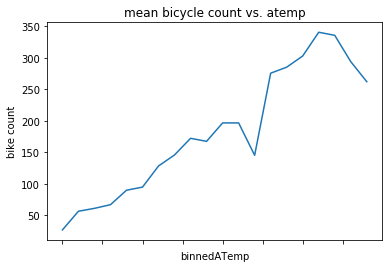

In [32]:
data.groupby(['binnedATemp'])['count'].mean().plot()
plt.ylabel("bike count")
plt.title("mean bicycle count vs. atemp")

#### Humidity
- Bike count is negatively linear in the humidity variable above a threshold of about 15
- Similar to temperature, low humidity levels would ideally be "bucketed off" to define a threshold for the linear mid-range humidity levels. This is not possible with linear regression, which cannot deal with missing values for the numerical temperature variable
- The same transformations can be applied as with temperature. The most promising are likely
    - applying a second order term to approximate the "inverted U-shape"
    - binning and one-hot-encoding the humidity values

In [33]:
data.groupby(['binnedHum'])['count'].count()

binnedHum
(-0.1, 5.0]       22
(5.0, 10.0]        2
(10.0, 15.0]       8
(15.0, 20.0]      46
(20.0, 25.0]     140
(25.0, 30.0]     274
(30.0, 35.0]     448
(35.0, 40.0]     698
(40.0, 45.0]     804
(45.0, 50.0]     946
(50.0, 55.0]     953
(55.0, 60.0]     861
(60.0, 65.0]     892
(65.0, 70.0]     953
(70.0, 75.0]     748
(75.0, 80.0]     789
(80.0, 85.0]     769
(85.0, 90.0]     851
(90.0, 95.0]     532
(95.0, 100.0]    150
Name: count, dtype: int64

Text(0.5, 1.0, 'mean bicycle count vs. humidity')

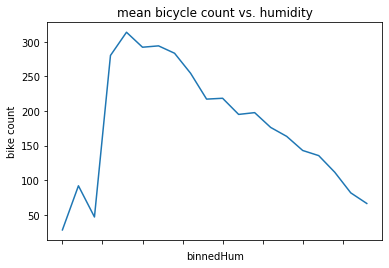

In [34]:
data.groupby(['binnedHum'])['count'].mean().plot()
plt.ylabel("bike count")
plt.title("mean bicycle count vs. humidity")

#### Wind speed
- Bike count follows a general inverted non-linear "U-shape" with respect to the wind speed
- For the largest wind speeds, the "inverted U-shape" is interrupted. This largest range contains only 3 records
- Aggregating the largest and second to largest wind speed buckets into a single bucket gives a mean of ca. 133 bikes, in accordance with the general "inverted U-shape" pattern


In [35]:
data.groupby(['binnedWind'])['count'].count()

binnedWind
(-0.057, 5.7]       1313
(5.7, 11.399]       4083
(11.399, 17.099]    2827
(17.099, 22.799]    1540
(22.799, 28.498]     696
(28.498, 34.198]     280
(34.198, 39.898]     107
(39.898, 45.598]      31
(45.598, 51.297]       6
(51.297, 56.997]       3
Name: count, dtype: int64

Text(0.5, 1.0, 'mean bicycle count vs. windspeed')

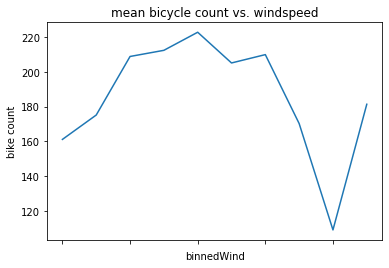

In [36]:
data.groupby(['binnedWind'])['count'].mean().plot()
plt.ylabel("bike count")
plt.title("mean bicycle count vs. windspeed")

In [37]:
data[data["windspeed"] > 45.5]['count'].mean()

133.11111111111111

## 4. Plot bike rental count vs. holiday/working day
- There are more than twice as many working days as weekend days and holidays put together
- The mean bicycle count is stable across weekend days, holidays and working days
- On working days, rush hour is from 7-8h and 17-18h

In [38]:
data.groupby(['holiday','workingday'])['count'].count()

holiday  workingday
0        0             3163
         1             7412
1        0              311
Name: count, dtype: int64

Text(0, 0.5, 'bike count')

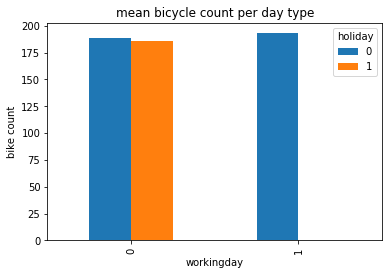

In [39]:
data.groupby(['holiday','workingday'])['count'].mean().unstack(0).plot.bar()
plt.title("mean bicycle count per day type")
plt.ylabel("bike count")

Text(0, 0.5, 'bike count')

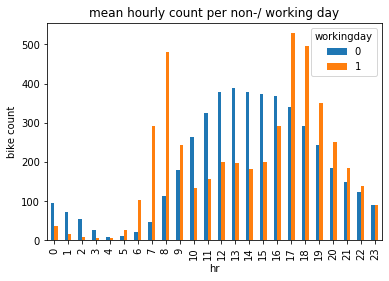

In [40]:
data.groupby(['hr','workingday'])['count'].mean().unstack().plot.bar()
plt.title("mean hourly count per non-/ working day")
plt.ylabel("bike count")

## 5. Plot bike rental count vs. registered / casual variables
Note: count = registered + casual, i.e. registered and casual variables are not potential predictors, but potential target variables
- The majority of bike rentals are by registered users
- Registered users rent slightly more on working days
- Casual users rent significantly more on non-working days
- Target count / registered / casual variables are positively skewed with a heavy right tail
- Casual and registered users have different daily rental patterns
    - Casual users do not participate in rush hours on working days

In [41]:
data.groupby(['workingday'])[['casual','registered']].mean()

,casual,registered
workingday,,
0,59.308290,129.198330
1,25.107663,167.904209


Text(0, 0.5, '')

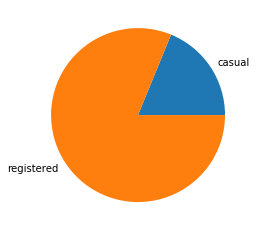

In [42]:
data[["casual","registered"]].mean().plot.pie(subplots=True)
plt.ylabel("")

Text(0.5, 1.0, 'working day')

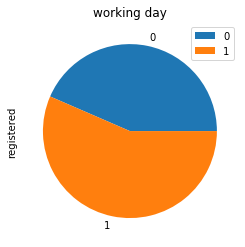

In [43]:
data.groupby(['workingday'])[['registered']].mean().plot.pie(subplots=True)
plt.title("working day")

Text(0.5, 1.0, 'working day')

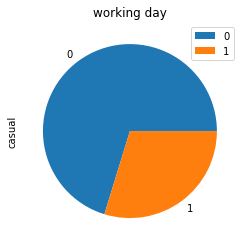

In [44]:
data.groupby(['workingday'])[['casual']].mean().plot.pie(subplots=True)
plt.title("working day")

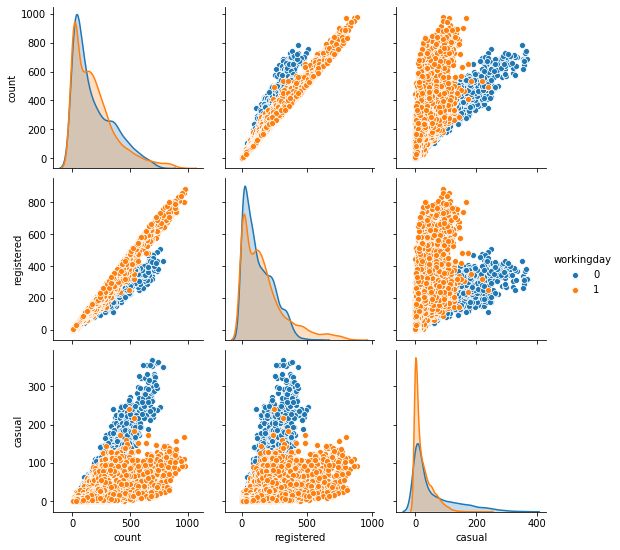

In [45]:
sns.pairplot(data[['count','registered','casual', 'workingday']], hue = "workingday")

Text(0, 0.5, 'bike count')

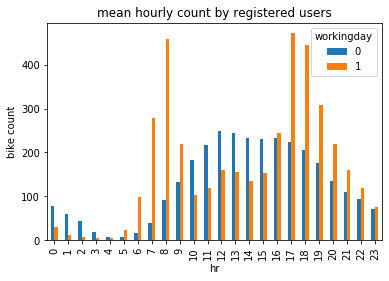

In [46]:
data.groupby(['hr','workingday'])['registered'].mean().unstack().plot.bar()
plt.title("mean hourly count by registered users")
plt.ylabel("bike count")

Text(0, 0.5, 'bike count')

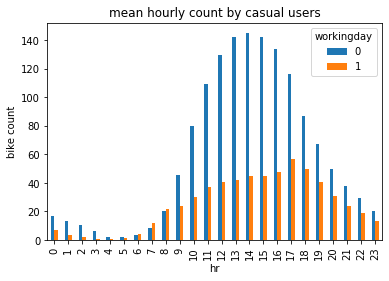

In [47]:
data.groupby(['hr','workingday'])['casual'].mean().unstack().plot.bar()
plt.title("mean hourly count by casual users")
plt.ylabel("bike count")

## 6. Plot pair-wise correlations

### Pair-wise correlations due to similarity of information
- season, quarter and month are strongly positively correlated
- temp and atemp are strongly positively correlated
- workingday is negatively correlated with holiday and day of week
- humidity and weather are positively correlated

### Pair-wise correlations due to underlying physicality
- season, quarter, month and hour are correlated with temp, atemp, humidity and windspeed

### Pair-wise correlations with target variable
- count is correlated with all variables but holiday, workingday, day and dayOfWeek

In [48]:
data[["holiday","workingday","weather","temp","atemp","humidity","windspeed","count","yr","season","qtr","mon","day","dayOfWeek","hr"]].corr().round(2)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,yr,season,qtr,mon,day,dayOfWeek,hr
holiday,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,-0.01,0.01,0.03,0.03,0.00,-0.02,-0.19,-0.00
workingday,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.70,0.00
weather,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.13,-0.01,0.01,0.01,0.01,-0.01,-0.05,-0.02
temp,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.39,0.06,0.26,0.26,0.26,0.02,-0.04,0.15
atemp,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.39,0.06,0.26,0.26,0.26,0.01,-0.04,0.14
humidity,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.32,-0.08,0.19,0.19,0.20,-0.01,-0.03,-0.28
windspeed,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.10,-0.02,-0.15,-0.15,-0.15,0.04,-0.02,0.15
count,-0.01,0.01,-0.13,0.39,0.39,-0.32,0.10,1.00,0.26,0.16,0.16,0.17,0.02,-0.00,0.40
yr,0.01,-0.00,-0.01,0.06,0.06,-0.08,-0.02,0.26,1.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
season,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.16,-0.00,1.00,1.00,0.97,0.00,-0.01,-0.01


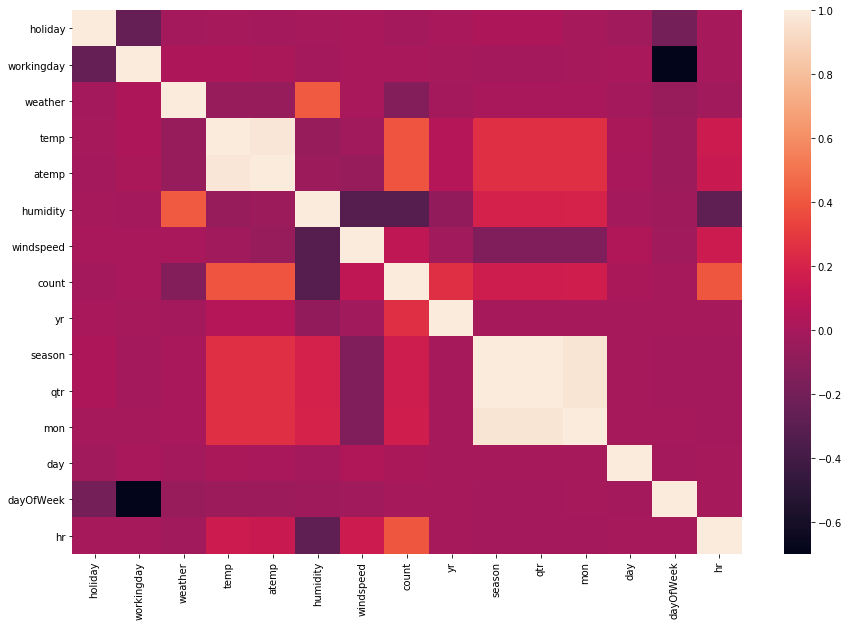

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(data[["holiday","workingday","weather","temp","atemp","humidity","windspeed","count","yr","season","qtr","mon","day","dayOfWeek","hr"]].corr().round(2))

## 7. Summary and conclusions

### Time features
- Time features are important for capturing trend as well as seasonal and daily cycles
    - The most promising (uncorrelated) time features are year, month and hour. These should be included in the model
    - workingday has a strong influence on the daily rental pattern and should be included in the model
    - There are more than twice as many working days as weekend days and holidays put together
    
### Weather features
- Weather variables are unsurprisingly correlated with count
    - temperature and humidity are linear with respect to count in the mid-range, and non-linear at extreme values. Transformations might be necessary
    - weather type is correlated with count, but is also correlated with humidity
    - windspeed is non-linear wrt count and should include a second order term in the model to capture the "inverted U-shape"

### Redundant variables
- Variables season, quarter and temp are redundant due to strong correlations with month and atemp
- weather type is possibly redundant due to high correlation with humidity

### Target variables
- Count equals sum of registered and casual rentals
- Registered and casual rentals have different daily patterns on working days
- All three target variables have a heavy right tail

### Model simplification
- To simplify the model, the distinction between registered and casual rentals can be discarded
    - Registered and casual rentals are summarized in the count target variable
    - As casual users are fewer on working days than on weekends, distinctions might be well-captured in the workingday variable
- A more differentiated model could separate registered from casual rentals at a later modelling stage